In [80]:
#loading dataset
import pandas as pd
data=pd.read_csv("Weather Data.csv")

In [82]:
data.head() # displaying top 5 records

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [86]:
data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [88]:
data.Weather.value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [90]:
# we have so many catorgories in weather columns so first merge them
# Clear Cloudy Snow Rain
data.Weather=data.Weather.apply(lambda x:'Clear'.lower() if 'Clear' in x  else x )
data.Weather=data.Weather.apply(lambda x:'Cloudy'.lower() if 'Cloudy' in x  else x )
data.Weather=data.Weather.apply(lambda x:'Snow'.lower() if 'Snow' in x  else x )
data.Weather=data.Weather.apply(lambda x:'Rain'.lower() if 'Rain' in x  else x )
data.Weather=data.Weather.apply(lambda x:'Fog'.lower() if 'Fog' in x  else x )
data.Weather=data.Weather.apply(lambda x:'Other'.lower() if x in ['Drizzle','Haze','Freezing Drizzle','Freezing Drizzle,Haze','Thunderstorms']   else x )

In [92]:
data.Weather.value_counts()

Weather
cloudy    3797
clear     3432
rain       662
snow       583
fog        241
other       69
Name: count, dtype: int64

In [94]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,fog
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,fog
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,fog


In [96]:
data.sample(6)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
2668,4/21/2012 4:00,5.7,3.4,85,13,25.0,100.20,cloudy
7507,11/8/2012 19:00,1.8,-3.3,69,9,25.0,101.27,cloudy
1826,3/17/2012 2:00,2.7,2.5,99,4,0.2,102.09,fog
3878,6/10/2012 14:00,26.5,5.9,27,6,48.3,101.40,cloudy
1729,3/13/2012 1:00,5.1,-0.9,65,13,25.0,101.07,rain
7750,11/18/2012 22:00,-1.3,-6.9,66,11,25.0,103.25,cloudy


In [98]:
data=data.iloc[:,1:]

In [100]:
X=data.drop('Weather',axis=1)

In [102]:
y=data.Weather

In [104]:
X.shape

(8784, 6)

In [106]:
y.shape

(8784,)

In [108]:
from sklearn.preprocessing import LabelEncoder

In [110]:
le=LabelEncoder()
y=le.fit_transform(y)

In [157]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def find_best_depth_auto(X, y, max_depth=10, test_size=0.2):
    results = []
    best_depth = None
    best_acc = 0
    best_model = None

    print(f" Checking depths from 1 to {max_depth}\n")

    for depth in range(1, max_depth + 1):
        model = DecisionTreeClassifier(max_depth=depth, random_state=42)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)

        results.append((depth, train_acc, test_acc))
        print(f"Depth {depth:2d} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

        if test_acc > best_acc:
            best_acc = test_acc
            best_depth = depth
            best_model = model

    print(f" Best Depth = {best_depth} with Test Accuracy = {best_acc:.4f}")
    return best_depth, best_model, results


In [159]:
find_best_depth_auto_split(X,y)

🔍 Evaluating model performance for different depths...

Depth  1 | Train: 0.4612 | Test: 0.4718
Depth  2 | Train: 0.5428 | Test: 0.5253
Depth  3 | Train: 0.5880 | Test: 0.5800
Depth  4 | Train: 0.5995 | Test: 0.5896
Depth  5 | Train: 0.6273 | Test: 0.6056
Depth  6 | Train: 0.6466 | Test: 0.6261
Depth  7 | Train: 0.6690 | Test: 0.6380
Depth  8 | Train: 0.6891 | Test: 0.6414
Depth  9 | Train: 0.7208 | Test: 0.6306
Depth 10 | Train: 0.7554 | Test: 0.6414
Depth 11 | Train: 0.7925 | Test: 0.6431
Depth 12 | Train: 0.8235 | Test: 0.6392
Depth 13 | Train: 0.8577 | Test: 0.6403
Depth 14 | Train: 0.8879 | Test: 0.6431
Depth 15 | Train: 0.9163 | Test: 0.6454
Depth 16 | Train: 0.9370 | Test: 0.6380
Depth 17 | Train: 0.9573 | Test: 0.6409
Depth 18 | Train: 0.9728 | Test: 0.6323
Depth 19 | Train: 0.9835 | Test: 0.6318
Depth 20 | Train: 0.9900 | Test: 0.6386

✅ Best Depth = 15 with Test Accuracy = 0.6454


(15,
 DecisionTreeClassifier(max_depth=15, random_state=42),
 [(1, 0.4612210046961719, 0.4718269778030734),
  (2, 0.5427636260139462, 0.5253272623790552),
  (3, 0.5880176462217163, 0.5799658508821856),
  (4, 0.5995446136331294, 0.5896414342629482),
  (5, 0.6272947203643091, 0.6055776892430279),
  (6, 0.6466486409563114, 0.6260671599317018),
  (7, 0.6689910345809023, 0.6380193511667616),
  (8, 0.6890564963711399, 0.6414342629482072),
  (9, 0.7207912338124377, 0.6306203756402959),
  (10, 0.7553721360466771, 0.6414342629482072),
  (11, 0.7925145865945639, 0.64314171883893),
  (12, 0.8235377828376264, 0.6391576550939101),
  (13, 0.8576917603529244, 0.6402959590210586),
  (14, 0.8878611071581044, 0.64314171883893),
  (15, 0.9163227550875196, 0.6454183266932271),
  (16, 0.9369574498363455, 0.6380193511667616),
  (17, 0.9573075281058774, 0.640865110984633),
  (18, 0.9728191262274085, 0.6323278315310188),
  (19, 0.9834922442009393, 0.6317586795674445),
  (20, 0.9900384232247047, 0.638588503130

In [161]:
best_depth, best_model, results = find_best_depth_auto(X, y)

 Checking depths from 1 to 10

Depth  1 | Train Acc: 0.4733 | Test Acc: 0.4686
Depth  2 | Train Acc: 0.5468 | Test Acc: 0.5364
Depth  3 | Train Acc: 0.5871 | Test Acc: 0.5820
Depth  4 | Train Acc: 0.5926 | Test Acc: 0.5865
Depth  5 | Train Acc: 0.6249 | Test Acc: 0.6202
Depth  6 | Train Acc: 0.6450 | Test Acc: 0.6248
Depth  7 | Train Acc: 0.6671 | Test Acc: 0.6334
Depth  8 | Train Acc: 0.6966 | Test Acc: 0.6430
Depth  9 | Train Acc: 0.7307 | Test Acc: 0.6311
Depth 10 | Train Acc: 0.7641 | Test Acc: 0.6412
 Best Depth = 8 with Test Accuracy = 0.6430


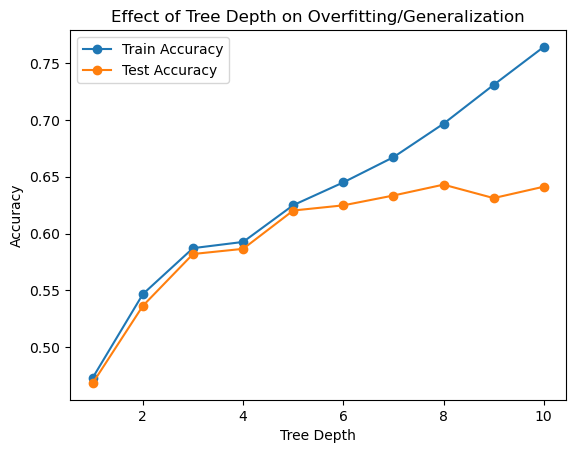

In [164]:
import matplotlib.pyplot as plt

depths = [r[0] for r in results]
train_acc = [r[1] for r in results]
test_acc = [r[2] for r in results]

plt.plot(depths, train_acc, marker='o', label='Train Accuracy')
plt.plot(depths, test_acc, marker='o', label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Effect of Tree Depth on Overfitting/Generalization')
plt.legend()
plt.show()
